In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math

In [74]:
def NormDistribution_px(x, a, s2):
        return (1/np.sqrt(2 * np.pi * s2) * np.exp(-1 * (x - a)**2 / (2*s2)))

def NormDistribution_Fx(x, a, s2):
    i, e = quad(NormDistribution_px, -np.inf, x, args = (a,s2))
    return i

def FisherDistribution_px(x, n, m):
    return n**(n/2) * m**(m/2) * x**(n/2 - 1) * math.gamma((n+m)/2) / ( (m+n*x)**((n+m)/2) * math.gamma(n/2) * math.gamma(m/2) )

def F_empir(v, prom):
    n = len(v)
    x = prom
    F_tilda = np.array([len(np.where(v < i)[0])/n for i in x])
    return F_tilda

# T1

In [75]:
def pr(M, digit = 3):
    n, m = M.shape
    for i in np.arange(n):
        for j in np.arange(m):
            print('%.3f' % M[i,j], end = "  ")
        print()

In [76]:
n = 50
p = 5
x = np.zeros((n, p + 1))

In [77]:

for i in np.arange(n):
    ksi = np.random.uniform(-1, 1, p)
    eta = np.random.normal(2 + 3*ksi[0] - 2*ksi[1] + ksi[2] + ksi[3] - ksi[4], 1.5**2)
    xi = np.append(ksi, eta)
    x[i] = xi

print("ksi_1,   ksi_2,   ksi_3,   ksi_4,   ksi_5,   eta")
pr(x)

ksi_1,   ksi_2,   ksi_3,   ksi_4,   ksi_5,   eta
0.509  -0.507  -0.353  0.268  -0.659  4.111  
0.343  -0.205  -0.060  -0.932  0.305  5.234  
-0.384  0.934  0.737  -0.275  0.207  0.215  
0.661  -0.902  0.072  0.805  0.808  6.160  
-0.694  0.591  -0.864  -0.268  0.592  -3.839  
0.044  0.988  -0.371  0.170  -0.369  1.877  
-0.680  0.634  -0.310  -0.010  0.016  -2.195  
-0.968  -0.224  -0.568  -0.579  0.566  -0.961  
-0.156  -0.515  0.059  0.561  -0.772  5.636  
-0.080  -0.768  -0.989  -0.584  0.617  -0.326  
-0.546  0.332  -0.243  -0.611  -0.997  2.364  
0.981  0.117  -0.668  0.452  -0.302  4.269  
0.429  0.993  0.662  0.845  -0.905  6.054  
0.667  0.695  -0.970  0.299  -0.517  3.712  
0.827  0.325  0.527  -0.976  -0.609  2.442  
0.767  -0.587  -0.907  -0.192  -0.657  2.333  
0.148  0.320  -0.877  0.542  -0.114  3.918  
0.620  0.794  -0.227  -0.700  0.194  1.091  
-0.688  -0.116  0.634  -0.641  0.909  -5.962  
0.976  0.953  0.027  0.588  0.905  5.581  
0.842  0.462  -0.444  0.474  -0.291 

## a) 

In [78]:
n = 50
p = 5
R2 = np.zeros(p)
DT = np.zeros(p)

for ksi in np.arange(p):   
    # матрицу наблюдений заполняем единицами и значениями оставшихся переменных     
    psi = np.zeros((n,p))
    psi[:, ksi] = 1
    for i in np.arange(0,p):
        if i == ksi:
            continue
        psi[:, i] = x[:, i]
    
    # вектор отклика     
    Y = np.zeros((n,1))
    Y[:,0] = x[:,ksi]
    
    # матрица Фишера
    F = np.dot(np.transpose(psi), psi)
    Fisher = np.linalg.inv(F)
    
    # коэффициенты линейной регрессии
    betta_tilda = np.dot(Fisher, np.dot(np.transpose(psi),Y))
    
    # вектор ошибок в эксперименте
    e = Y - np.dot(psi, betta_tilda)
    
    # остаточная сумма квадратов 
    RSS = np.dot(np.transpose(e), e)[0][0]
    
    # полная сумма квадратов - дисперсия отклика 
    TSS = ((Y - Y.mean())**2).sum()
    
    # коэффициент детерминации     
    R2[ksi] = 1 - RSS/TSS
    
    # критерий значимости регрессии    
    DT[ksi] = R2[ksi]/(1-R2[ksi]) * (n-p)/(n-1)

for i in np.arange(p):
    print(f"R2[{i}] = {R2[i]}, DT[{i}] = {DT[i]}")

R2[0] = 0.06864113946833283, DT[0] = 0.06768366503584033
R2[1] = 0.043459699256869655, DT[1] = 0.04172533940732146
R2[2] = 0.04559349656436362, DT[2] = 0.04387184949678054
R2[3] = 0.026831257956690946, DT[3] = 0.025320327421305088
R2[4] = 0.04956072164017444, DT[4] = 0.04788832856697944


## b) 

In [79]:
# 1) уравнения линейной регрессии
n = 50
p = 6

psi = np.zeros((n,p))
psi[:,0] = 1
psi[:, 1:] = x[:,:-1]

Y = np.zeros((n,1))
Y[:,0] = x[:,-1]

F = np.dot(np.transpose(psi), psi)
Fisher = np.linalg.inv(F)

betta_coefficient = np.dot(Fisher, np.dot(np.transpose(psi),Y))

for i in range(p):
    print(f"betta[{i}] = {betta_coefficient[i][0]}")

betta[0] = 1.9111242856739787
betta[1] = 2.7639371367339516
betta[2] = -1.2972145849867454
betta[3] = 1.3519864118969045
betta[4] = 1.2870300233560963
betta[5] = -1.1392351019546971


In [80]:
# 2) проверка значимости коэффициентов
e = Y - np.dot(psi, betta_coefficient)
RSS = np.dot(np.transpose(e), e)[0][0]

betta_significance_coefficient = np.zeros(p)
for i in range(p):
    betta_significance_coefficient[i] = betta_coefficient[i][0] * np.sqrt(n-p) / np.sqrt(RSS * Fisher[i,i])
    print(f"delta[{i}] = {betta_significance_coefficient[i]}")
    
delta_krit = 2.015368
print()
print(f"Для распределения Стьюдента с числом степеней свободы {n-p}, чтобы p-value было больше 0.05, нужно, чтобы  модуль \nкритерия был меньше {delta_krit}")
print()

for i in range(p):
    if np.abs(betta_significance_coefficient[i]) <= np.abs(delta_krit):
        print(f"betta[{i}] не значимо отличен от нуля")
    else:
        print(f"betta[{i}] значимо отличен от нуля")

delta[0] = 6.28837434404563
delta[1] = 5.668040398272568
delta[2] = -2.7394420047618055
delta[3] = 2.6272850774450283
delta[4] = 2.360549904026564
delta[5] = -2.104591471796483

Для распределения Стьюдента с числом степеней свободы 44, чтобы p-value было больше 0.05, нужно, чтобы  модуль 
критерия был меньше 2.015368

betta[0] значимо отличен от нуля
betta[1] значимо отличен от нуля
betta[2] значимо отличен от нуля
betta[3] значимо отличен от нуля
betta[4] значимо отличен от нуля
betta[5] значимо отличен от нуля


## c) 

In [81]:
n = 50
p = 6

RSS = np.dot(np.transpose(e), e)[0][0]
TSS = ((Y - Y.mean())**2).sum()
alpha = 0.05


In [82]:
R2 = 1 - RSS/TSS
print("R2 =", R2)


R2 = 0.628570512305684


In [83]:
delta_tilda = R2/(1-R2) * (n-p)/(p-1)
print("delta =", delta_tilda, f" распределена по F({p-1},{n-p})")


delta = 14.892249246625084  распределена по F(5,44)


In [84]:
p_value, _ = quad(FisherDistribution_px, delta_tilda, +np.inf, args=(p-1,n-p))
print("p_value =", p_value)

p_value = 1.5044175395443127e-08


In [85]:
if p_value <= alpha:
    print("Уравнение регрессии значимо")
    print(f"Уравнение регрессии объясняет разброс отклика на {R2*100} % ")
else:
    print("Уравнение регрессии не значимо")

Уравнение регрессии значимо
Уравнение регрессии объясняет разброс отклика на 62.857051230568395 % 


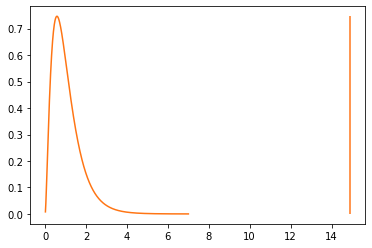

In [86]:
t = np.linspace(0.01, 7, 1000)
func = FisherDistribution_px(t, p-1, n-p)
plt.plot(t, func, color = '#ff7514')
plt.vlines(delta_tilda, func.min(), func.max(), color = '#ff7518')

## d) 


In [87]:
y0 = betta_coefficient[0][0]
print("В x_i = 0, значение =", y0)


psi0 = np.array([1,0,0,0,0,0])
t_gamma = 2.015368
 
l = y0 - t_gamma*np.sqrt(1 + np.dot(psi0, np.dot(Fisher, np.transpose(psi0)))) * np.sqrt(RSS/(n-p))
r = y0 + t_gamma*np.sqrt(1 + np.dot(psi0, np.dot(Fisher, np.transpose(psi0)))) * np.sqrt(RSS/(n-p))

print(f"95 % доверительный интервал для этого значения:[{l}, {r}]")

В x_i = 0, значение = 1.9111242856739787
95 % доверительный интервал для этого значения:[-2.3438998357521905, 6.166148407100148]


## e) 

In [88]:
def I (q):
    n = len(q)
    inv_count = 0
    for i in np.arange(n):
        for j in np.arange(i+1, n):
            if q[i] > q[j]:
                inv_count += 1
    return inv_count

In [89]:
e = Y - np.dot(psi, betta_coefficient)
print(np.transpose(e))

i = I(e)
print("Инверсий:", i)

delta_tilda = (i - n*(n-1)/4)/np.sqrt(n**3 / 36)
print("delta = ", delta_tilda)

p_value, _ = quad(NormDistribution_px, np.abs(delta_tilda), +np.inf, args=(0,1))
p_value *= 2
print("p_value =", p_value)

alpha = 0.05
print("Основная гипотеза: Ошибки независимы и имеют одинаковое распределение")
if p_value > alpha:
    print("Нет оснований отвергнуть основную гипотезу")
else:
    print("Основная гипотеза отвергается")

[[-0.48454791  3.73671034  0.16928768  1.03742907 -0.87793796  0.98751677
  -0.9546331   1.67158416  1.80541497 -0.22002726  2.37316553 -0.22492195
   1.23223529  1.19643465 -1.48303498 -1.73434473  2.37079198 -0.07534173
  -5.11661707  2.44552318  0.2574688   0.68843591  4.23772687 -0.30966841
   0.72029936 -1.47809675  2.45519519  0.99534163 -1.63828127  0.24563149
  -1.00691285 -0.2515587  -0.9761567  -2.53638729 -4.99359632 -1.00187575
  -3.75562287 -1.87746241  3.16131624 -1.56157886  0.84512604 -0.06699798
   0.1384015  -1.0506396   2.27174572 -2.09740265 -0.55161081  1.33080394
   1.89612439 -1.94445477]]
Инверсий: 716
delta =  1.756453244467384
p_value = 0.07901104821492029
Основная гипотеза: Ошибки независимы и имеют одинаковое распределение
Нет оснований отвергнуть основную гипотезу


## f) 

In [90]:
error = np.transpose(e)[0]
error

array([-0.48454791,  3.73671034,  0.16928768,  1.03742907, -0.87793796,
        0.98751677, -0.9546331 ,  1.67158416,  1.80541497, -0.22002726,
        2.37316553, -0.22492195,  1.23223529,  1.19643465, -1.48303498,
       -1.73434473,  2.37079198, -0.07534173, -5.11661707,  2.44552318,
        0.2574688 ,  0.68843591,  4.23772687, -0.30966841,  0.72029936,
       -1.47809675,  2.45519519,  0.99534163, -1.63828127,  0.24563149,
       -1.00691285, -0.2515587 , -0.9761567 , -2.53638729, -4.99359632,
       -1.00187575, -3.75562287, -1.87746241,  3.16131624, -1.56157886,
        0.84512604, -0.06699798,  0.1384015 , -1.0506396 ,  2.27174572,
       -2.09740265, -0.55161081,  1.33080394,  1.89612439, -1.94445477])

 
a = -1.2967404927621828e-15, s2 = 3.8413559706481455
delta = 0.4211729717200039


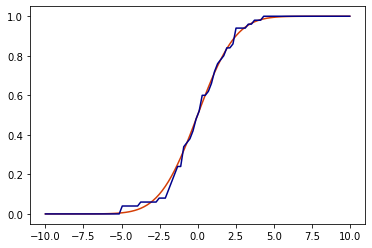

In [91]:
# 1) оценка параметров по выборке
a1 = error.mean()
a2 = (error**2).mean()

a = a1
s2 = a2 - a1**2
print(f" \na = {a}, s2 = {s2}")

#посчитаем значение критерия
Nnods = 100
xx = np.linspace(-10, 10, Nnods)
F_tilda = F_empir(error, xx)
F = np.array([NormDistribution_Fx(xx[i], a, s2) for i in np.arange(Nnods)])

delta_tilda = np.sqrt(n) * (np.abs(F - F_tilda)).max()
print("delta =", delta_tilda)

plt.plot(xx, F, color = '#d53e07')
plt.plot(xx, F_tilda, color = '#00008B')

In [ ]:
# бутстрап

N_but = 5000
delta_list = np.empty(N_but)

Nnods = 100
xx_star = np.linspace(-10, 10, Nnods)

for but_iter in np.arange(N_but):
    xstar = np.random.normal(a, s2, n)
    a_star = xstar.mean()
    s2_star = (xstar**2).mean() - a_star**2
    F_tilda = F_empir(xstar, xx_star)
    F = np.array([NormDistribution_Fx(xx_star[i], a_star, s2_star) for i in np.arange(Nnods)])

    delta_star = np.sqrt(n) * (np.abs(F - F_tilda)).max()
    delta_list[but_iter] = delta_star

delta_list = np.array(delta_list)

k = 1
p_value =  1.0
нет оснований отвергнуть гипотезу о нормальном распределении ошибок


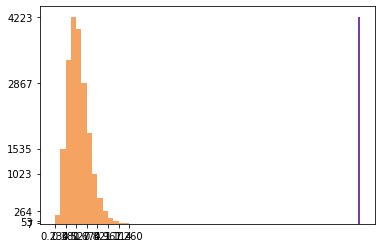

In [120]:
delta_list = np.sort(delta_list)

k = 1
for i in np.arange(1, N_but):
    if (delta_list[i-1] < delta_tilda) and (delta_tilda <= delta_list[i]):
        k = i
        break 
        
p_value = 1 - (k-1)/N_but
print("k =",k)
print("p_value = ", p_value)

alpha = 0.05
if p_value > alpha:
    print("нет оснований отвергнуть гипотезу о нормальном распределении ошибок")
else:
    print("гипотеза о нормальном распределении ошибок отвергается")

khist = int(1 + np.trunc(np.log2(N_but)))
hist = np.histogram(delta_list, khist)

plt.hist(delta_list, khist, color = '#F4A460')
plt.yticks([hist[0][i] for i in range(1,khist,2)])
plt.xticks([hist[1][i] for i in range(0,khist,2)])
plt.vlines(delta_tilda, 0, hist[0].max(), color = '#4B0082')

## g) 

In [99]:
pr(x)

0.509  -0.507  -0.353  0.268  -0.659  4.111  
0.343  -0.205  -0.060  -0.932  0.305  5.234  
-0.384  0.934  0.737  -0.275  0.207  0.215  
0.661  -0.902  0.072  0.805  0.808  6.160  
-0.694  0.591  -0.864  -0.268  0.592  -3.839  
0.044  0.988  -0.371  0.170  -0.369  1.877  
-0.680  0.634  -0.310  -0.010  0.016  -2.195  
-0.968  -0.224  -0.568  -0.579  0.566  -0.961  
-0.156  -0.515  0.059  0.561  -0.772  5.636  
-0.080  -0.768  -0.989  -0.584  0.617  -0.326  
-0.546  0.332  -0.243  -0.611  -0.997  2.364  
0.981  0.117  -0.668  0.452  -0.302  4.269  
0.429  0.993  0.662  0.845  -0.905  6.054  
0.667  0.695  -0.970  0.299  -0.517  3.712  
0.827  0.325  0.527  -0.976  -0.609  2.442  
0.767  -0.587  -0.907  -0.192  -0.657  2.333  
0.148  0.320  -0.877  0.542  -0.114  3.918  
0.620  0.794  -0.227  -0.700  0.194  1.091  
-0.688  -0.116  0.634  -0.641  0.909  -5.962  
0.976  0.953  0.027  0.588  0.905  5.581  
0.842  0.462  -0.444  0.474  -0.291  4.238  
0.111  -0.509  -0.271  0.101  -0.624  4.

__TSS__:

In [100]:
TSS

517.104335804587

In [108]:
CVSS = 0

for i in np.arange(n):
    y_i = x[i, -1]
    x_star = psi[i, :]

    psi_star = np.empty((n-1, p))
    psi_star[:i,:] = psi[:i, :]
    psi_star[i:,:] = psi[i+1:, :]

    y_star = np.empty((n-1, 1))
    y_star[:i] = Y[:i]
    y_star[i:] = Y[i+1:]

    F_star = np.dot(np.transpose(psi_star), psi_star)
    Fisher_star = np.linalg.inv(F_star)
    betta_tilda = np.dot(Fisher_star, np.dot(np.transpose(psi_star), y_star))[:,0]

    y_tilda_i = np.dot(betta_tilda, x_star)
    
    cvss_i = (y_tilda_i - y_i)**2
    CVSS += cvss_i
print("CVSS =", CVSS)

R2cv = 1 - CVSS/TSS
print("\n R2cv =", R2cv )

CVSS = 253.31250168216332

 R2cv = 0.5101327060272615


## h) 

[ 0.68921626 -0.74595143 -0.79419002 -0.78060627  0.47471963] [4.8070423  4.31574091 0.49813114 2.98860273 3.14909158] 2.7907961403787036
delta = 1.5641333224649472
p_value = 0.362756542167457
нет оснований для отвержения гипотезы об адекватности модели


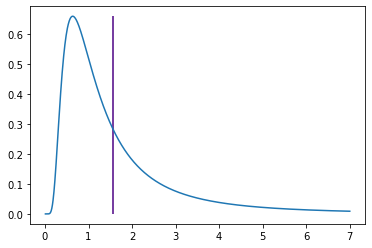

In [102]:
# 1) генерируем точку измерения
ksi = np.random.uniform(-1, 1, p-1)

# 2) генерируем k=5 возможных значений \eta
k = 5
eta = np.random.normal(2 + 3*ksi[0] - 2*ksi[1] + ksi[2] + ksi[3] - ksi[4], 1.5**2, k)

# выборочное среднее квадратичное отклонение
s2_star = 1/(k-1) * ((eta - eta.mean())**2).sum()

print(ksi, eta, s2_star)

# проверяем адекватнотсь модели
if RSS <= (k-1)*s2_star:
    print("модель адекватна")
else:
    delta_tilda = RSS / ((n-p) * s2_star)
    print("delta =", delta_tilda)
    
    alpha = 0.05
    p_value, _ = quad(FisherDistribution_px, delta_tilda, +np.inf, args=(n-p,k-1))
    print("p_value =", p_value)
    
    if p_value <= alpha:
        print("модель НЕ адекватна")
    else:
        print("нет оснований для отвержения гипотезы об адекватности модели")

    xx = np.linspace(0.01, 7, 1000)
    func = FisherDistribution_px(xx, n-p, k-1)
    plt.plot(xx, func)
    plt.vlines(delta_tilda, func.min(), func.max(), color = '#4B0082')


In [103]:
ind_of_less_signif_coeff = np.argmin(np.abs(betta_significance_coefficient))
print(f"наименее значим коэффициент betta[{ind_of_less_signif_coeff}]")

наименее значим коэффициент betta[5]


повторим пункт b: определим уравнение линейной регрессии и проверим значимость коэффициентов

In [109]:
# 1) определение уравнения линейной регрессии
n_new = 50
p_new = 5

PSI_new = np.zeros((n_new, p_new))
PSI_new[:,:ind_of_less_signif_coeff] = psi[:,:ind_of_less_signif_coeff]
PSI_new[:,ind_of_less_signif_coeff:] = psi[:,ind_of_less_signif_coeff+1:]

Y_new = Y
F_new = np.dot(np.transpose(PSI_new), PSI_new)
Fisher_new = np.linalg.inv(F_new)

betta_coefficient_new = np.dot(Fisher_new, np.dot(np.transpose(PSI_new), Y_new))
for i in range(p_new):
    print(f"betta_new[{i}] = {betta_coefficient_new[i][0]}")
print()
    
# 2) проверка значимости коэффициентов
e_new = Y_new - np.dot(PSI_new, betta_coefficient_new)
RSS_new = np.dot(np.transpose(e_new), e_new)[0][0]

betta_significance_coefficient_new = np.zeros(p_new)
for i in range(p_new):
    betta_significance_coefficient_new[i] = betta_coefficient_new[i][0] * np.sqrt(n_new - p_new) / np.sqrt(RSS_new * Fisher_new[i,i])
    print(f"delta_new[{i}] = {betta_significance_coefficient_new[i]}")
print()

delta_krit_new = 2.014103
print(f"Для распределения Стьюдента с числом степеней свободы {n_new-p_new}, чтобы p-value было больше 0.05, нужно чтобы  модуль \nкритерия был меньше {delta_krit_new}")
print()

for i in range(p_new):
    if np.abs(betta_significance_coefficient_new[i]) <= np.abs(delta_krit_new):
        print(f"betta_new[{i}] не значимо отличен от нуля")
    else:
        print(f"betta_new[{i}] значимо отличен от нуля")  

betta_new[0] = 1.9686374217252594
betta_new[1] = 2.948166878679523
betta_new[2] = -1.4264530356759872
betta_new[3] = 1.2903994972952535
betta_new[4] = 1.3251259992581517

delta_new[0] = 6.269460513481746
delta_new[1] = 5.9240918688687305
delta_new[2] = -2.928483097548621
delta_new[3] = 2.421110103639906
delta_new[4] = 2.3440846903179398

Для распределения Стьюдента с числом степеней свободы 45, чтобы p-value было больше 0.05, нужно чтобы  модуль 
критерия был меньше 2.014103

betta_new[0] значимо отличен от нуля
betta_new[1] значимо отличен от нуля
betta_new[2] значимо отличен от нуля
betta_new[3] значимо отличен от нуля
betta_new[4] значимо отличен от нуля


R2_new = 0.5911801808343955
delta = 1.3280192123360424  распределена по F(4,45)
p_value = 0.2741624311999783
Уравнение регрессии не значимо


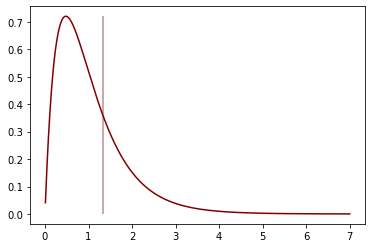

In [112]:
TSS_new = ((Y_new - Y_new.mean())**2).sum()

# коэффициент детерминации - доля дисперсии отклика, которая объясняется регрессией
R2_new = 1 - RSS_new/TSS_new
print("R2_new =", R2_new)

# проверка значимости регрессии 
delta_tilda = R2_new/(1-R2_new) * (n_new-p_new)/(n_new-1)
print("delta =", delta_tilda, f" распределена по F({p_new-1},{n_new-p_new})")

alpha = 0.05
p_value, _ = quad(FisherDistribution_px, delta_tilda, +np.inf, args=(p_new-1,n_new-p_new))
print("p_value =", p_value)

if p_value <= alpha:
    print("Уравнение регрессии значимо")
    print(f" Уравнение регрессии объясняет разброс отклика на {R2_new*100}% ")
else:
    print("Уравнение регрессии не значимо")
    
xx = np.linspace(0.01, 7, 1000)
func = FisherDistribution_px(xx, p_new-1, n_new-p_new)
plt.plot(xx, func, color = '#800000')
plt.vlines(delta_tilda, func.min(), func.max(), color = '#BC8F8F')

сравним эти две регрессии

In [113]:
# параметры для регрессии с меньшим числом факторов
RSS1 = RSS_new
p1 = p_new

# параметры для регрессии с бОльшим числом факторов
RSS2 = RSS
p2 = p

print("RSS1 =", RSS1, "p1 =", p1)
print("RSS2 =", RSS2, "p2 =", p2)

if RSS2 > RSS1:
    print("нет оснований отвергнуть гипотезу о незначимости дополнительных коэффициентов. Можно использовать упрощённую регрессию")
else:
    delta_tilda = (RSS1 - RSS2)/RSS2 * (n-p2)/(p2-p1)
    alpha = 0.05
    p_value, _ = quad(FisherDistribution_px, delta_tilda, +np.inf, args=(p2-p1,n-p2))
    if p_value > alpha:
        print("нет оснований отвергнуть гипотезу о незначимости дополнительных коэффициентов. Можно использовать \nупрощённую регрессию")
    else:
        print("гипотеза о незначимости дополнительных коэффициентов отвергается. Есть существенное различие между \nрегрессими")


RSS1 = 211.4025010533813 p1 = 5
RSS2 = 192.0677985324073 p2 = 6
гипотеза о незначимости дополнительных коэффициентов отвергается. Есть существенное различие между 
регрессими


## j) 

In [114]:
def regression_analysis(PSI, Y):
    """
    по матрице наблюдений PSI, вектору отклика Y вернёт:
    
    1. betta_coefficient - оценку коэффицинетов регрессии
    2. betta_significance_coefficient - коэффициенты значимости коэффициентов регрессии
    3. err - вектор ошибок в эксперименте
    4. Fisher - Матрицу Фишера, соответствующую данной регрессии
    5. RSS - остаточную сумму квадратов
    6. TSS - дисперсию отклика
    7. R2 - коэффициент детерминации
    """
    n, p = PSI.shape
    
    # 1) определение уравнения линейной регрессии

    F = np.dot(np.transpose(PSI), PSI)
    Fisher = np.linalg.inv(F) 
    betta_coefficient = np.dot(Fisher, np.dot(np.transpose(PSI),Y))

    # 2) проверка значимости коэффициентов
    
    e = Y - np.dot(PSI, betta_coefficient)
    RSS = np.dot(np.transpose(e), e)[0][0]
    
    betta_significance_coefficient = np.zeros(p)
    for i in range(p):
        betta_significance_coefficient[i] = betta_coefficient[i][0] * np.sqrt(n-p) / np.sqrt(RSS * Fisher[i,i])
    
    TSS = ((Y - Y.mean())**2).sum()
    R2 = 1 - RSS/TSS
    err = np.transpose(e)[0]

    return betta_coefficient, betta_significance_coefficient, err, Fisher, RSS, TSS, R2

In [115]:
ind_of_less_signif_coeff

5

In [116]:
n = 50
p = 6
p1 = 5
p2 = 6

N_but = 20000
delta_star_list = np.empty(N_but)
for but_iter in np.arange(N_but):
    
    x_star = x[np.random.randint(0,n,n),:]
    
    PSI2 = np.empty((n,p))
    PSI2[:,0] = 1
    PSI2[:,1:] = x_star[:,:-1]
    Y2 = np.empty((n,1))
    Y2[:,0] = x_star[:, -1]
    
    PSI1 = np.empty((n, p-1))
    PSI1[:, :ind_of_less_signif_coeff] = PSI2[:,:ind_of_less_signif_coeff]
    PSI1[:,ind_of_less_signif_coeff:] = PSI2[:, ind_of_less_signif_coeff+1:]
    Y1 = Y2
    
    _, _, _, _, RSS1, _, _ = regression_analysis(PSI1, Y1)
    _, _, _, _, RSS2, _, _ = regression_analysis(PSI2, Y2)
    
    delta_star = (RSS1 - RSS2)/RSS2 * (n-p2)/(p2-p1)
    
    delta_star_list[but_iter] = delta_star

In [117]:
delta_star_list

array([10.66905538,  2.76770012,  0.14946565, ...,  3.15888887,
       10.10730053,  4.48186168])

In [118]:
delta_star_list = np.sort(delta_star_list)
k = 1
for i in np.arange(1, N_but):
    if (delta_star_list[i-1] < delta_tilda) and (delta_tilda <= delta_star_list[i]):
        k = i
        break

p_value = 1 - (k-1)/N_but
print("k =",k)
print("p_value = ", p_value)

alpha = 0.05
if p_value > alpha:
    print("нет оснований отвергнуть гипотезу о незначимости дополнительных коэффициентов. Можно использовать упрощённую регрессию")
else:
    print("гипотеза о незначимости дополнительных коэффициентов отвергается. Есть существенное различие между \nрегрессими")

    
    

khist = int(1 + np.trunc(np.log2(N_but)))
hist = np.histogram(delta_star_list, khist)

plt.hist(delta_star_list, khist. color = '#4B0082')
plt.yticks([hist[0][i] for i in range(1,khist,2)])
plt.xticks([hist[1][i] for i in range(0,khist,2)])
plt.vlines(delta_tilda, 0, hist[0].max())
plt.xlim(hist[1].min(), hist[1].max())

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-118-05b5a601d6e1>, line 24)